In [2]:
import pandas as pd
import sqlite3

In [19]:
db_path = "../data/traffic_data.db"
conn=sqlite3.connect(db_path)
df=pd.read_sql_query('select * from traffic_data',conn)

print("Data Shape:", df.shape)
print(df.head())

Data Shape: (1146, 9)
   id location_name      lat      lon                   timestamp  \
0   1         Dadar  19.0176  72.8562  2025-07-23T23:25:24.659867   
1   2       Andheri  19.1197  72.8468  2025-07-23T23:25:25.672796   
2   3         Powai  19.1197  72.9051  2025-07-23T23:25:26.528793   
3   4        Colaba  18.9067  72.8147  2025-07-23T23:25:27.154680   
4   5        Panvel  18.9894  73.1175  2025-07-23T23:25:27.893369   

   current_speed  free_flow_speed  confidence road_class  
0           27.0             27.0         1.0    Unknown  
1           22.0             22.0         1.0    Unknown  
2           31.0             31.0         1.0    Unknown  
3           23.0             23.0         1.0    Unknown  
4           21.0             21.0         1.0    Unknown  


In [22]:
import sqlite3
import pandas as pd

db_path = "../data/traffic_data.db"
conn = sqlite3.connect(db_path)

df = pd.read_sql_query("SELECT * FROM traffic_data_enriched", conn)


print("Shape:", df.shape)
print(df.head())


Shape: (1146, 10)
   id location_name      lat     lon                   timestamp  \
0   6        Airoli  19.1551  72.996  2025-07-23 23:25:28.634594   
1  15        Airoli  19.1551  72.996  2025-07-23 23:36:39.585756   
2  24        Airoli  19.1551  72.996  2025-07-23 23:40:35.138675   
3  33        Airoli  19.1551  72.996  2025-07-23 23:51:45.171316   
4  42        Airoli  19.1551  72.996  2025-07-23 23:55:40.513498   

   current_speed  free_flow_speed  confidence road_class  hour  
0           15.0             15.0    0.879039    Unknown    23  
1           15.0             15.0    0.879039    Unknown    23  
2           15.0             15.0    0.872698    Unknown    23  
3           15.0             15.0    0.872698    Unknown    23  
4           15.0             15.0    0.872698    Unknown    23  


In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# ➤ Add only required derived columns
df['is_weekend'] = df['timestamp'].dt.weekday.isin([5,6]).astype(int)
df['is_rush_hour'] = df['timestamp'].dt.hour.isin([7,8,9,17,18,19]).astype(int)
df['congestion_level'] = df['free_flow_speed'] - df['current_speed']
df['traffic_ratio'] = df['current_speed'] / df['free_flow_speed']
df['speed_drop_percent'] = (1 - (df['current_speed'] / df['free_flow_speed'])) * 100


# Replace infinities & NaNs in ratio
df['traffic_ratio'] = df['traffic_ratio'].replace([float('inf'), -float('inf')], None)

# ➤ Save as enriched table
df.to_sql("traffic_data_enriched", conn, if_exists="replace", index=False)

print("✅ Enriched data saved to table 'traffic_data_enriched'")

✅ Enriched data saved to table 'traffic_data_enriched'


In [24]:
import sqlite3
import pandas as pd

db_path = "../data/traffic_data.db"
conn = sqlite3.connect(db_path)

df = pd.read_sql_query("SELECT * FROM traffic_data_enriched", conn)
conn.close()

print("Shape:", df.shape)
print(df.head())


Shape: (1146, 15)
   id location_name      lat     lon                   timestamp  \
0   6        Airoli  19.1551  72.996  2025-07-23 23:25:28.634594   
1  15        Airoli  19.1551  72.996  2025-07-23 23:36:39.585756   
2  24        Airoli  19.1551  72.996  2025-07-23 23:40:35.138675   
3  33        Airoli  19.1551  72.996  2025-07-23 23:51:45.171316   
4  42        Airoli  19.1551  72.996  2025-07-23 23:55:40.513498   

   current_speed  free_flow_speed  confidence road_class  hour  is_weekend  \
0           15.0             15.0    0.879039    Unknown    23           0   
1           15.0             15.0    0.879039    Unknown    23           0   
2           15.0             15.0    0.872698    Unknown    23           0   
3           15.0             15.0    0.872698    Unknown    23           0   
4           15.0             15.0    0.872698    Unknown    23           0   

   is_rush_hour  congestion_level  traffic_ratio  speed_drop_percent  
0             0               0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1146 non-null   int64         
 1   location_name       1146 non-null   object        
 2   lat                 1146 non-null   float64       
 3   lon                 1146 non-null   float64       
 4   timestamp           1146 non-null   datetime64[ns]
 5   current_speed       1146 non-null   float64       
 6   free_flow_speed     1146 non-null   float64       
 7   confidence          1146 non-null   float64       
 8   road_class          1146 non-null   object        
 9   is_weekend          1146 non-null   int64         
 10  is_rush_hour        1146 non-null   int64         
 11  congestion_level    1146 non-null   float64       
 12  traffic_ratio       1146 non-null   float64       
 13  speed_drop_percent  1146 non-null   float64     

In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [30]:
df.head

<bound method NDFrame.head of         id location_name      lat      lon                  timestamp  \
0        6        Airoli  19.1551  72.9960 2025-07-23 23:25:28.634594   
1       15        Airoli  19.1551  72.9960 2025-07-23 23:36:39.585756   
2       24        Airoli  19.1551  72.9960 2025-07-23 23:40:35.138675   
3       33        Airoli  19.1551  72.9960 2025-07-23 23:51:45.171316   
4       42        Airoli  19.1551  72.9960 2025-07-23 23:55:40.513498   
...    ...           ...      ...      ...                        ...   
1141  1108         Vashi  19.0760  72.9986 2025-07-26 15:17:41.457130   
1142  1117         Vashi  19.0760  72.9986 2025-07-26 15:32:48.249472   
1143  1126         Vashi  19.0760  72.9986 2025-07-26 15:47:56.918679   
1144  1135         Vashi  19.0760  72.9986 2025-07-26 16:18:12.924948   
1145  1144         Vashi  19.0760  72.9986 2025-07-26 16:33:19.355936   

      current_speed  free_flow_speed  confidence road_class  hour  is_weekend  \
0           

In [10]:
df.describe()

,id,lat,lon,timestamp,current_speed,free_flow_speed,confidence,is_weekend,is_rush_hour,congestion_level,traffic_ratio,speed_drop_percent
count,1146.00000,1146.000000,1146.000000,1146,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,573.50000,19.050160,72.957192,2025-07-25 06:39:52.283887616,19.950262,22.470332,0.976619,0.214660,0.094241,2.520070,0.892421,10.757871
min,1.00000,18.906700,72.814700,2025-07-23 23:25:24.659867,6.000000,14.000000,0.609692,0.000000,0.000000,0.000000,0.375000,0.000000
25%,287.25000,19.017600,72.856200,2025-07-24 14:58:58.699296256,17.000000,21.000000,0.985766,0.000000,0.000000,0.000000,0.772727,0.000000
50%,573.50000,19.033400,72.996000,2025-07-25 11:54:08.036718592,20.000000,22.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,859.75000,19.119700,73.018600,2025-07-25 22:51:39.171272448,22.000000,24.000000,1.000000,0.000000,0.000000,5.000000,1.000000,22.727273
max,1146.00000,19.155100,73.117500,2025-07-26 16:33:20.327741,31.000000,31.000000,1.000000,1.000000,1.000000,10.000000,1.000000,62.500000
std,330.96601,0.072466,0.099663,NaN,4.435089,4.362153,0.053245,0.410765,0.292291,3.071781,0.129363,12.936283


In [3]:
df['location_name'].value_counts()

location_name
Dadar       128
Andheri     128
Powai       128
Colaba      127
Panvel      127
Airoli      127
Vashi       127
Nerul       127
Kharghar    127
Name: count, dtype: int64

In [12]:
df['is_weekend'].value_counts()

is_weekend
0    900
1    246
Name: count, dtype: int64

In [13]:
df['is_rush_hour'].value_counts()

is_rush_hour
0    1038
1     108
Name: count, dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.isnull().sum()

id                    0
location_name         0
lat                   0
lon                   0
timestamp             0
current_speed         0
free_flow_speed       0
confidence            0
road_class            0
is_weekend            0
is_rush_hour          0
congestion_level      0
traffic_ratio         0
speed_drop_percent    0
hour                  0
dtype: int64

In [20]:
df[(df['traffic_ratio'] > 1.2) & (df['traffic_ratio']< 0)]


,id,location_name,lat,lon,timestamp,current_speed,free_flow_speed,confidence,road_class,is_weekend,is_rush_hour,congestion_level,traffic_ratio,speed_drop_percent


In [2]:
df['location_name'].unique()


array(['Dadar', 'Andheri', 'Powai', 'Colaba', 'Panvel', 'Airoli', 'Vashi',
       'Nerul', 'Kharghar'], dtype=object)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.sort_values(by=['location_name', 'timestamp'])

In [33]:
df

,id,location_name,lat,lon,timestamp,current_speed,free_flow_speed,confidence,road_class,hour,is_weekend,is_rush_hour,congestion_level,traffic_ratio,speed_drop_percent
0,6,Airoli,19.1551,72.9960,2025-07-23 23:25:28.634594,15.0,15.0,0.879039,Unknown,23,0,0,0.0,1.000000,0.000000
1,15,Airoli,19.1551,72.9960,2025-07-23 23:36:39.585756,15.0,15.0,0.879039,Unknown,23,0,0,0.0,1.000000,0.000000
2,24,Airoli,19.1551,72.9960,2025-07-23 23:40:35.138675,15.0,15.0,0.872698,Unknown,23,0,0,0.0,1.000000,0.000000
3,33,Airoli,19.1551,72.9960,2025-07-23 23:51:45.171316,15.0,15.0,0.872698,Unknown,23,0,0,0.0,1.000000,0.000000
4,42,Airoli,19.1551,72.9960,2025-07-23 23:55:40.513498,15.0,15.0,0.872698,Unknown,23,0,0,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,1108,Vashi,19.0760,72.9986,2025-07-26 15:17:41.457130,21.0,24.0,0.995596,Unknown,15,1,0,3.0,0.875000,12.500000
1142,1117,Vashi,19.0760,72.9986,2025-07-26 15:32:48.249472,20.0,24.0,0.993619,Unknown,15,1,0,4.0,0.833333,16.666667
1143,1126,Vashi,19.0760,72.9986,2025-07-26 15:47:56.918679,19.0,24.0,0.993613,Unknown,15,1,0,5.0,0.791667,20.833333
1144,1135,Vashi,19.0760,72.9986,2025-07-26 16:18:12.924948,18.0,24.0,0.995823,Unknown,16,1,0,6.0,0.750000,25.000000


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1146 non-null   int64         
 1   location_name       1146 non-null   object        
 2   lat                 1146 non-null   float64       
 3   lon                 1146 non-null   float64       
 4   timestamp           1146 non-null   datetime64[ns]
 5   current_speed       1146 non-null   float64       
 6   free_flow_speed     1146 non-null   float64       
 7   confidence          1146 non-null   float64       
 8   road_class          1146 non-null   object        
 9   hour                1146 non-null   int64         
 10  is_weekend          1146 non-null   int64         
 11  is_rush_hour        1146 non-null   int64         
 12  congestion_level    1146 non-null   float64       
 13  traffic_ratio       1146 non-null   float64     

In [35]:
import pandas as pd
df['timestamp'] = pd.to_datetime(df['timestamp'])
import sqlite3

conn = sqlite3.connect("../data/traffic_data.db")

# Overwrite the enriched table
df.to_sql("traffic_data_enriched", conn, if_exists="replace", index=False)

conn.close()
print("✅ Changes saved to 'traffic_data_enriched' in database.")


✅ Changes saved to 'traffic_data_enriched' in database.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 5 to 1143
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1146 non-null   int64         
 1   location_name    1146 non-null   object        
 2   lat              1146 non-null   float64       
 3   lon              1146 non-null   float64       
 4   timestamp        1146 non-null   datetime64[ns]
 5   current_speed    1146 non-null   float64       
 6   free_flow_speed  1146 non-null   float64       
 7   confidence       1146 non-null   float64       
 8   road_class       1146 non-null   object        
 9   hour             1146 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(2)
memory usage: 94.0+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


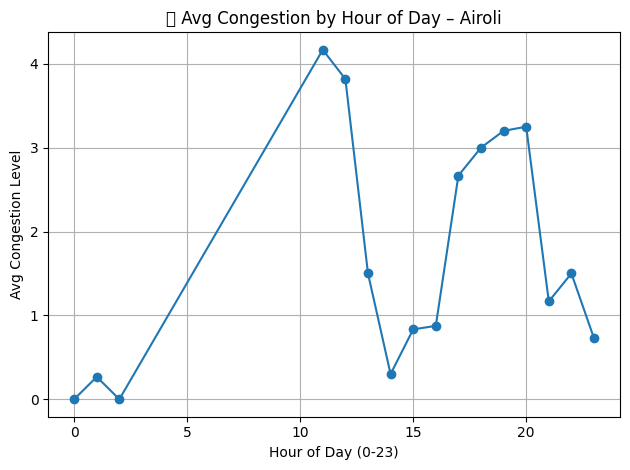

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


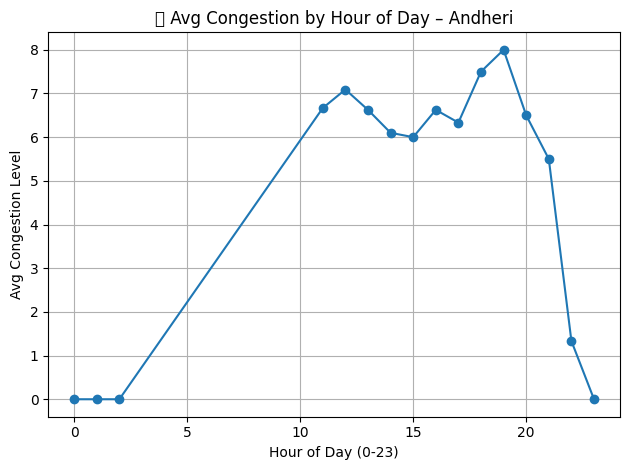

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


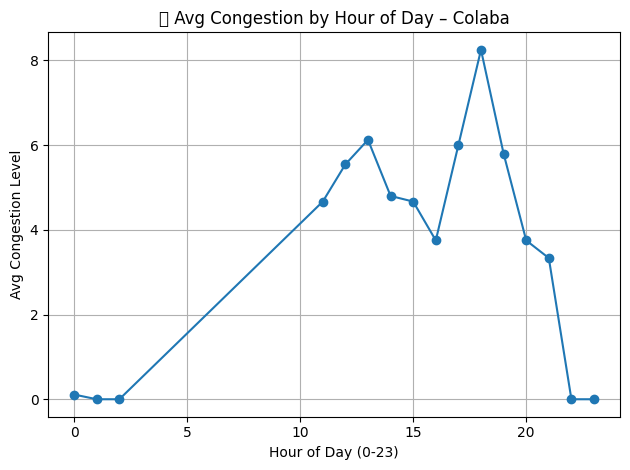

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


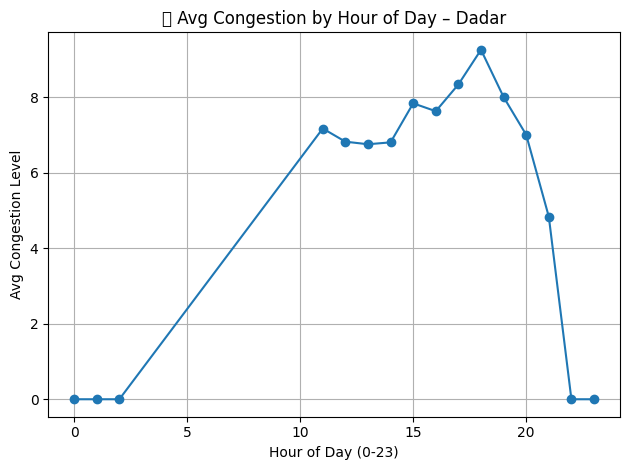

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


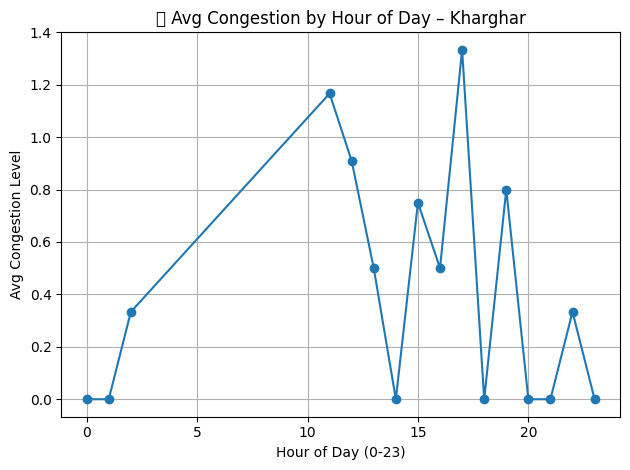

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


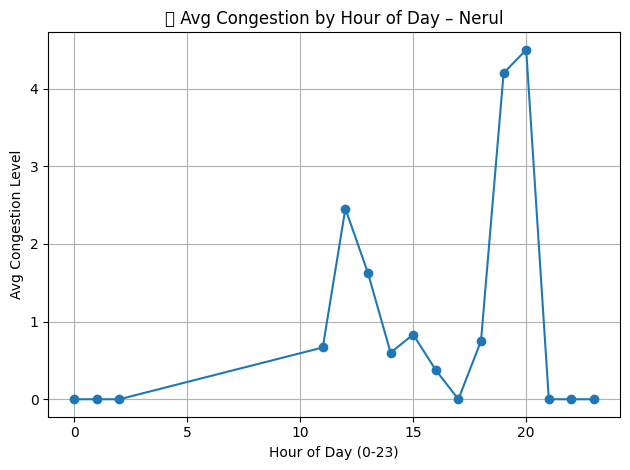

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


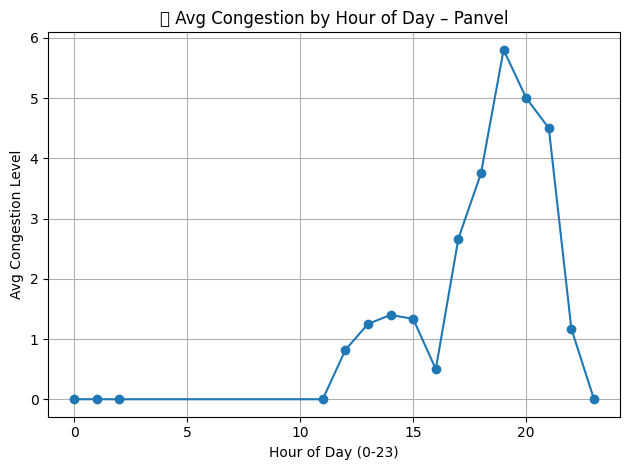

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


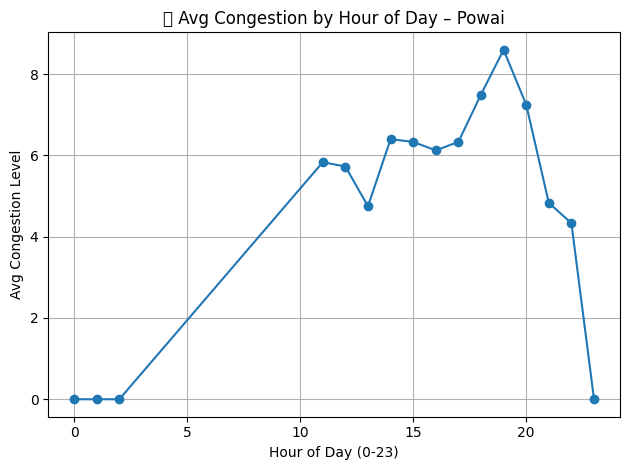

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\871363103.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


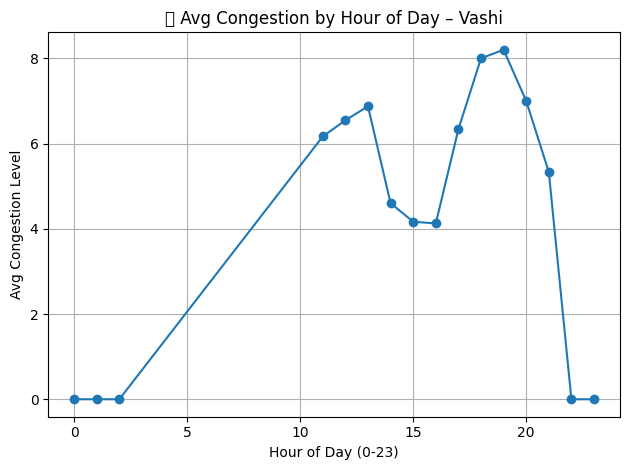

In [36]:
df['hour'] = df['timestamp'].dt.hour  # extract hour
locations = df['location_name'].unique()
for loc in locations:
    df_loc = df[df['location_name'] == loc]
    hourly_avg = df_loc.groupby('hour')['congestion_level'].mean().reset_index()

    plt.plot(hourly_avg['hour'], hourly_avg['congestion_level'], marker='o', linestyle='-')
    plt.title(f"⏳ Avg Congestion by Hour of Day – {loc}")
    plt.xlabel("Hour of Day (0-23)")
    plt.ylabel("Avg Congestion Level")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20272\2905961443.py:19: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


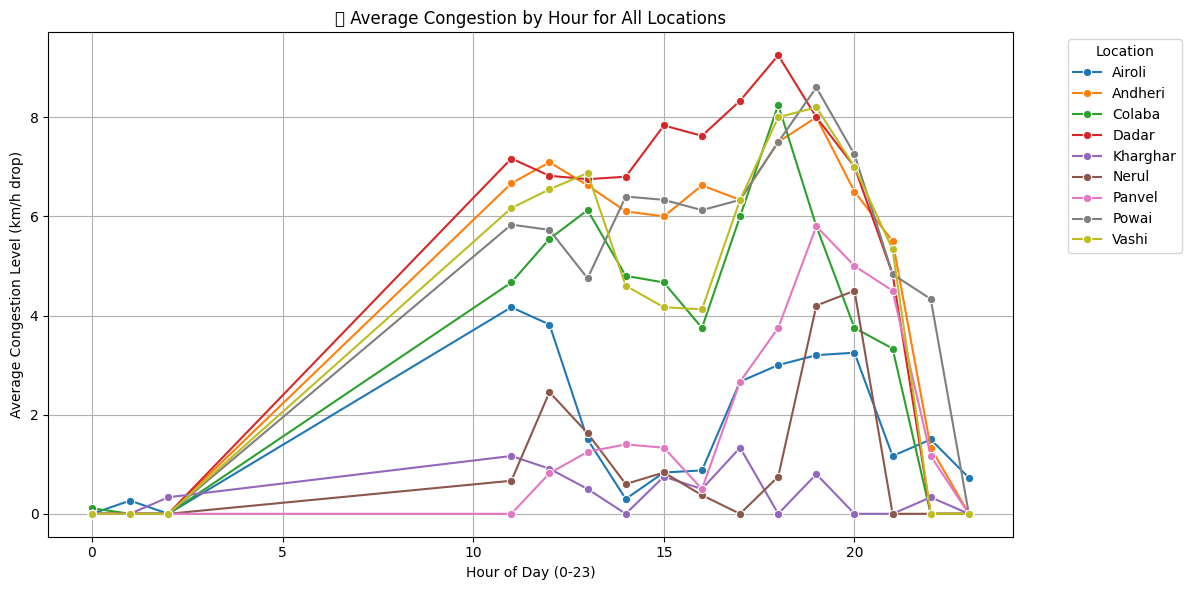

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure hour column exists
df['hour'] = df['timestamp'].dt.hour

# Group by location + hour
hourly_all = df.groupby(['location_name', 'hour'])['congestion_level'].mean().reset_index()

# Plot: Multiple lines, one per location
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_all, x='hour', y='congestion_level', hue='location_name', marker='o')

plt.title("⏳ Average Congestion by Hour for All Locations")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Congestion Level (km/h drop)")
plt.grid(True)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


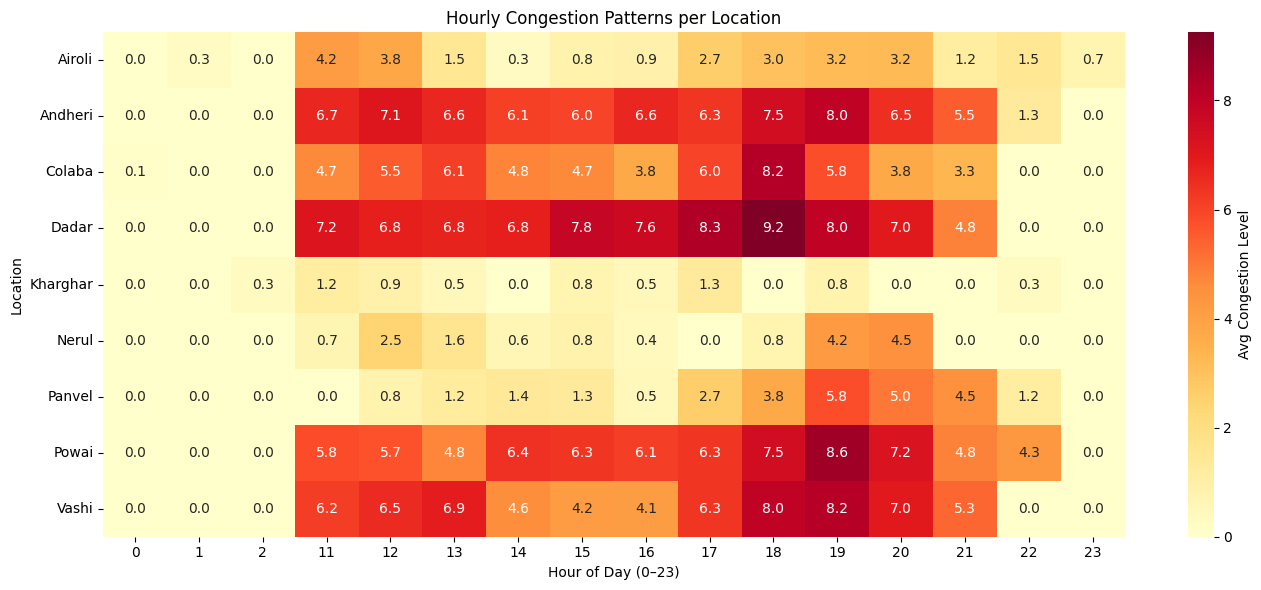

In [18]:
df['hour'] = df['timestamp'].dt.hour
hourly_all = df.groupby(['location_name', 'hour'])['congestion_level'].mean().reset_index()
heatmap_data = hourly_all.pivot(index='location_name', columns='hour', values='congestion_level')
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f", cbar_kws={'label': 'Avg Congestion Level'})
plt.title("Hourly Congestion Patterns per Location")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


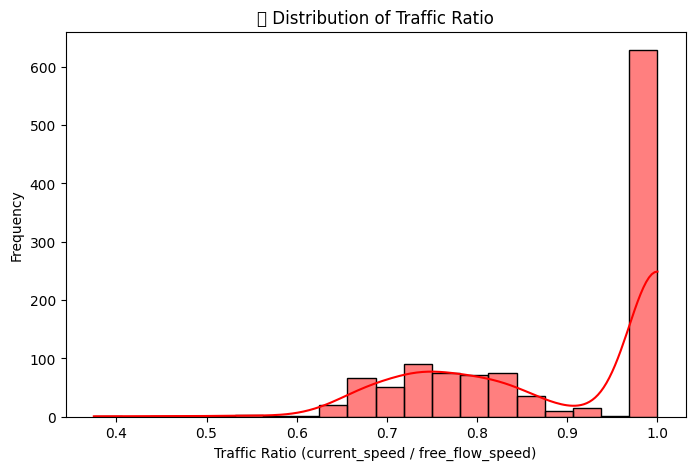

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['traffic_ratio'], bins=20, kde=True, color='red')
plt.title("📊 Distribution of Traffic Ratio")
plt.xlabel("Traffic Ratio (current_speed / free_flow_speed)")
plt.ylabel("Frequency")
plt.show()


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


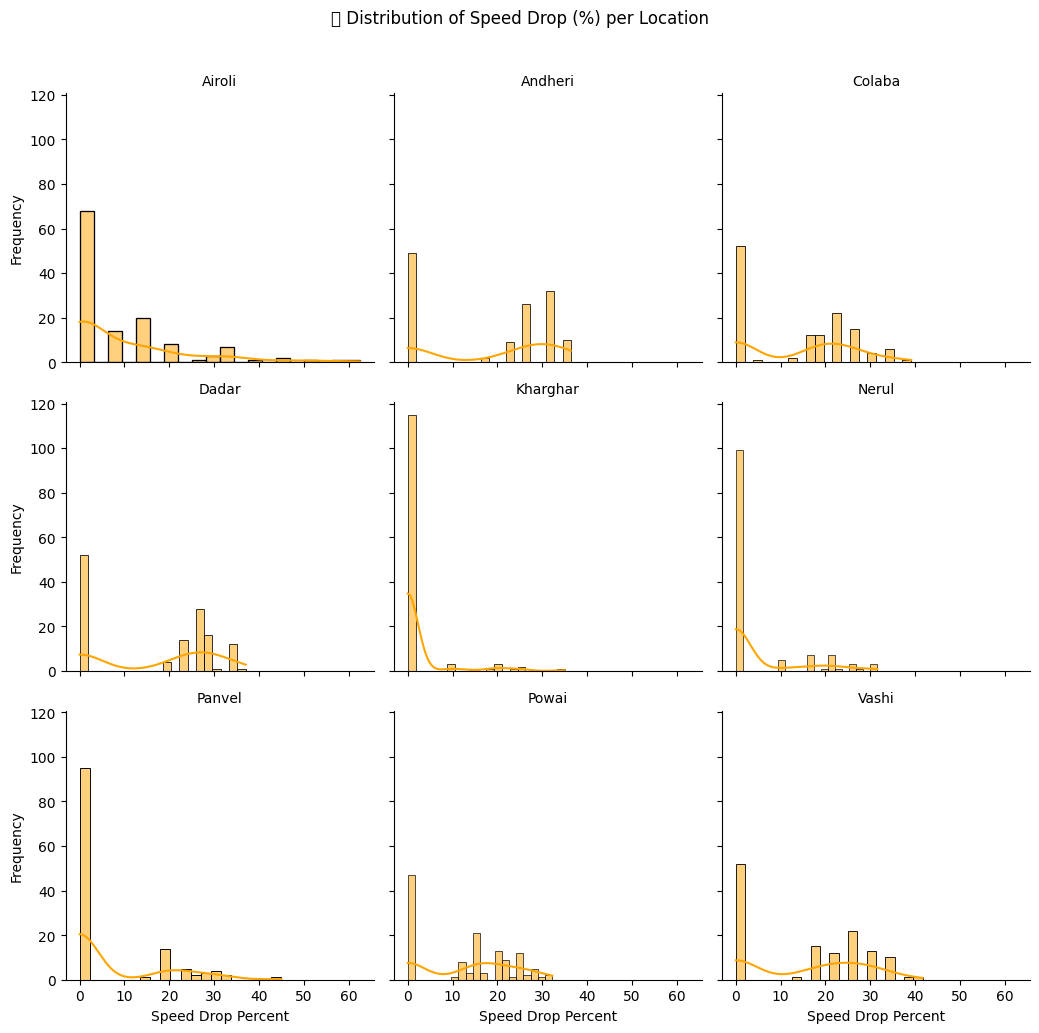

In [12]:
g = sns.FacetGrid(df, col="location_name", col_wrap=3, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="speed_drop_percent", bins=20, color="orange", kde=True)
g.set_axis_labels("Speed Drop Percent", "Frequency")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("📊 Distribution of Speed Drop (%) per Location")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\827098495.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


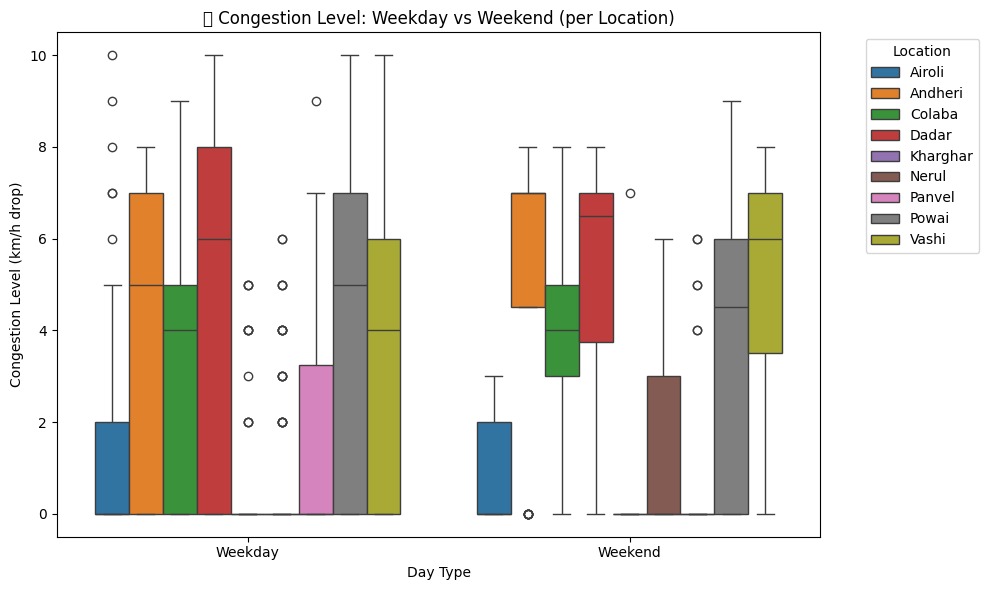

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="is_weekend", y="congestion_level", hue="location_name")
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title("📦 Congestion Level: Weekday vs Weekend (per Location)")
plt.xlabel("Day Type")
plt.ylabel("Congestion Level (km/h drop)")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7360\1636162136.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


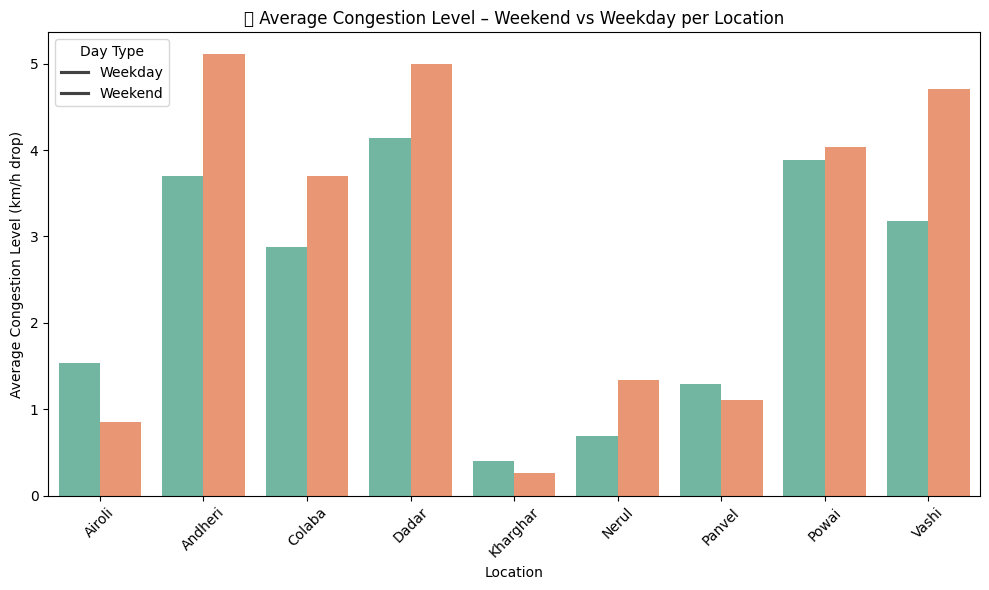

In [15]:
# Calculate mean congestion by location & weekend flag
weekend_avg = df.groupby(['location_name','is_weekend'])['congestion_level'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=weekend_avg, x='location_name', y='congestion_level', hue='is_weekend', palette='Set2')

plt.title("📊 Average Congestion Level – Weekend vs Weekday per Location")
plt.xlabel("Location")
plt.ylabel("Average Congestion Level (km/h drop)")
plt.legend(title="Day Type", labels=['Weekday','Weekend'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


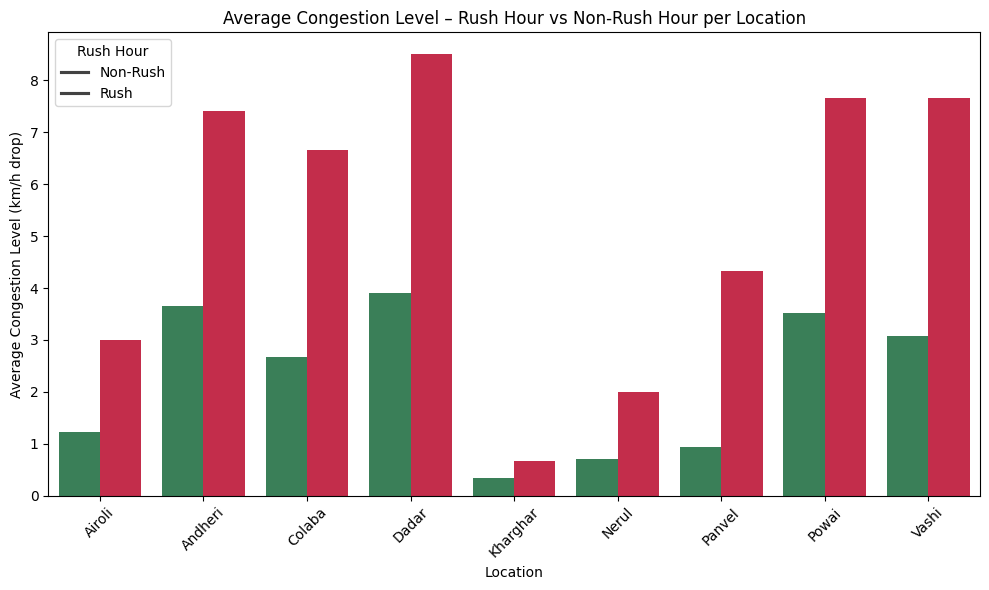

In [39]:
# Custom palette for clarity
palette_colors = {0: "seagreen", 1: "crimson"}  # 0=Non-Rush, 1=Rush

plt.figure(figsize=(10,6))
sns.barplot(data=rush_avg, x='location_name', y='congestion_level', hue='is_rush_hour', palette=palette_colors)

plt.title("Average Congestion Level – Rush Hour vs Non-Rush Hour per Location")
plt.xlabel("Location")
plt.ylabel("Average Congestion Level (km/h drop)")
plt.legend(title="Rush Hour", labels=['Non-Rush','Rush'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\886734382.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


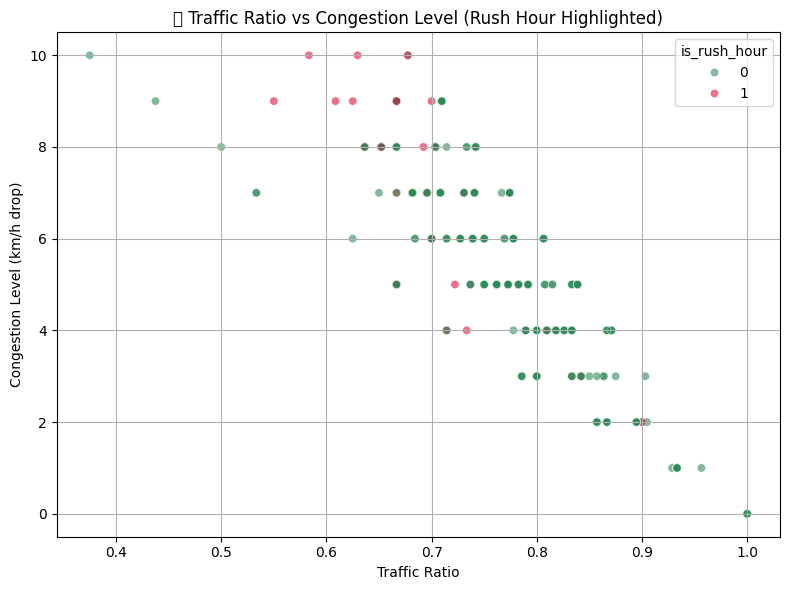

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='traffic_ratio', y='congestion_level', hue='is_rush_hour', palette={0:'seagreen',1:'crimson'}, alpha=0.6)
plt.title("🔍 Traffic Ratio vs Congestion Level (Rush Hour Highlighted)")
plt.xlabel("Traffic Ratio")
plt.ylabel("Congestion Level (km/h drop)")
#plt.legend(title="Rush Hour", labels=['Non-Rush','Rush'])
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\3162222180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='location_name', y='congestion_level', palette='muted')


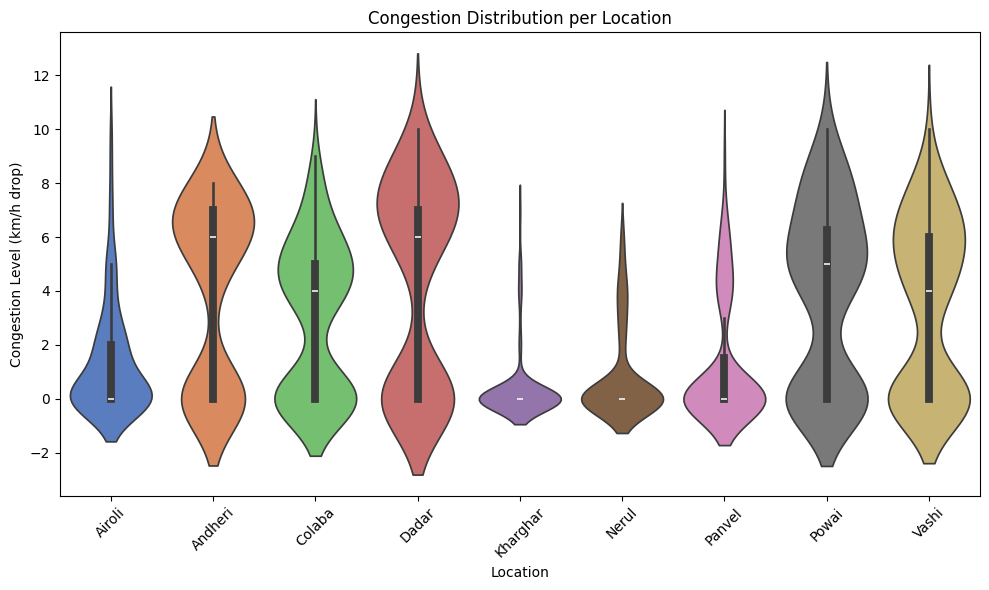

In [43]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='location_name', y='congestion_level', palette='muted')
plt.title("Congestion Distribution per Location")
plt.xlabel("Location")
plt.ylabel("Congestion Level (km/h drop)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10916\3083894778.py:9: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


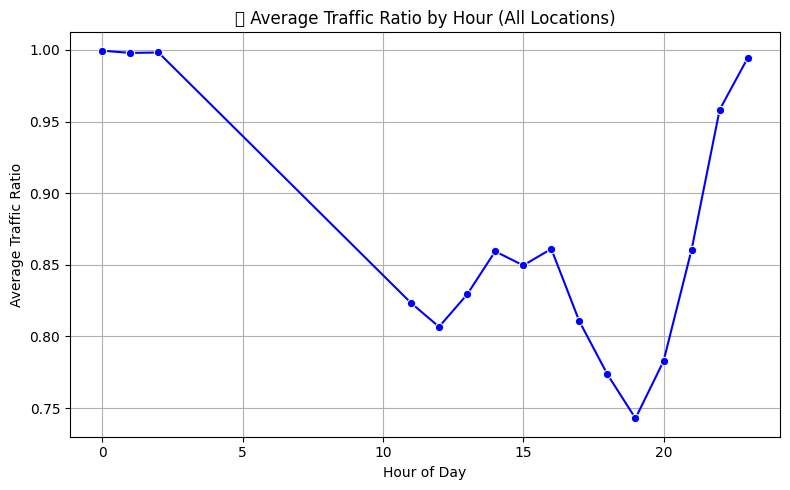

In [44]:
hourly = df.groupby('hour')['traffic_ratio'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=hourly, x='hour', y='traffic_ratio', marker='o', color='blue')
plt.title("⏳ Average Traffic Ratio by Hour (All Locations)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()
